In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号


In [9]:
# 添加列名
header_row = ['age','sex','cp','trestbps','chol','fbs',\
                'restecg','thalach','exang','oldpeak','slope','ca','thal','target']
 
# 载入数据
heart = pd.read_csv('processed.cleveland.data.csv',names=header_row)

#心脏病（0=否，1=是）
heart["target"] = np.where(heart["target"] != 0, 1, 0)

In [10]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

<AxesSubplot:ylabel='target'>

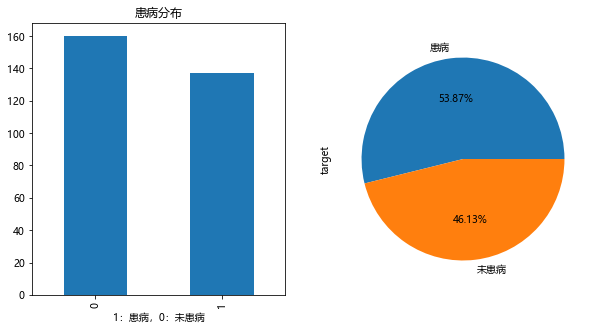

In [11]:
#心脏病预测-性别与患病分析
# 患病的分布情况
fig,axes = plt.subplots(1,2,figsize=(10,5))
ax = heart.target.value_counts().plot(kind="bar",ax=axes[0])
ax.set_title("患病分布")
ax.set_xlabel("1：患病，0：未患病")

heart.target.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['患病','未患病'],ax=axes[1])


E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
E:\Anaconda\lib\site-packages\pandas\plotting\_tools.py:314: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

Text(0.5, 1.0, '患病性别比例')

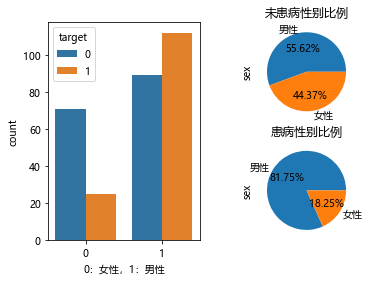

In [15]:
# 性别和患病的分布
ax1 = plt.subplot(121)
ax = sns.countplot(x="sex",hue='target',data=heart,ax=ax1)
ax.set_xlabel("0：女性，1：男性")

ax2 = plt.subplot(222)
heart[heart['target'] == 0].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("未患病性别比例")

ax2 = plt.subplot(224)
heart[heart['target'] == 1].sex.value_counts().plot(kind="pie",autopct="%.2f%%",labels=['男性','女性'],ax=ax2)
ax2.set_title("患病性别比例")


<AxesSubplot:xlabel='age', ylabel='count'>

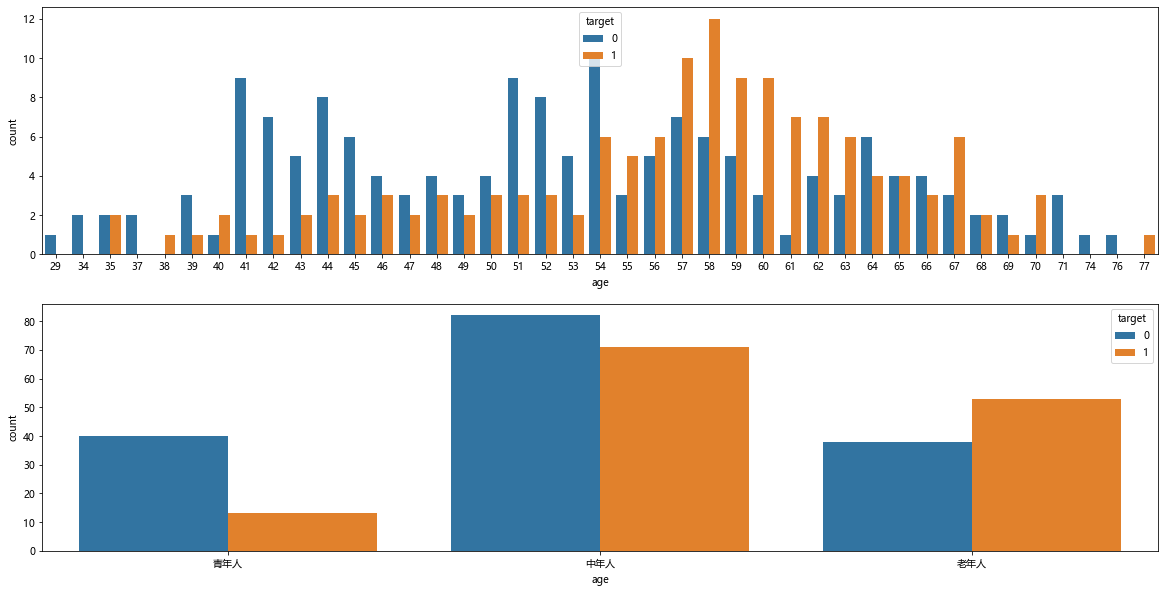

In [17]:
fig,axes = plt.subplots(2,1,figsize=(20,10))
sns.countplot(x="age",hue="target",data=heart,ax=axes[0])

# 0-45：青年人，45-59：中年人，60-100：老年人
age_type = pd.cut(heart.age,bins=[0,45,60,100],include_lowest=True,right=False,labels=['青年人','中年人','老年人'])
age_target_df = pd.concat([age_type,heart.target],axis=1)
sns.countplot(x="age",hue='target',data=age_target_df)


<AxesSubplot:>

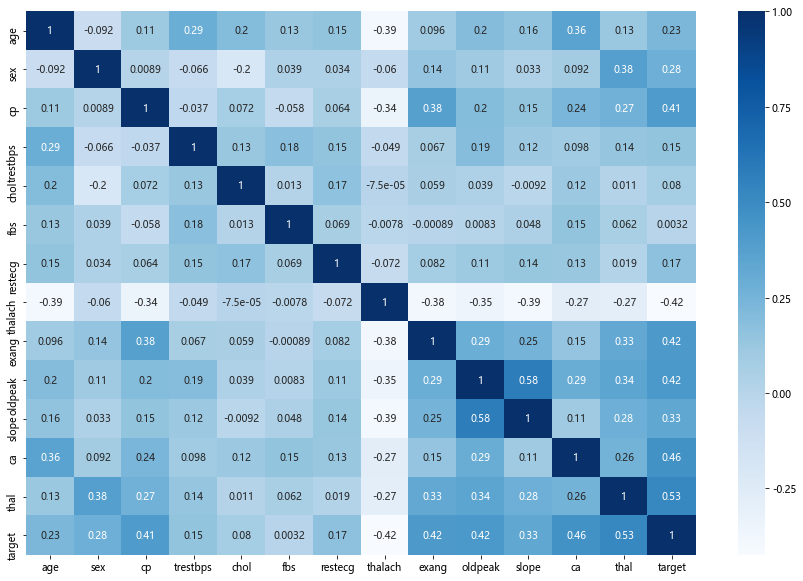

In [24]:
#心脏病预测-特征相关性分析
# 统一看下所有特征的分布情况
# fig,axes = plt.subplots(7,2,figsize=(10,20))
# for x in range(0,14):
#     plt.subplot(7,2,x+1)
#     sns.distplot(heart.iloc[:,x],kde=True)

# plt.tight_layout()

plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(),cmap="Blues",annot=True)


心脏病预测-特征预处理

In [29]:
# 数据预处理
features = heart[['age','sex','cp','trestbps','chol','fbs',\
                'restecg','thalach','exang','oldpeak','slope','ca','thal']]
targets = heart['target']


In [30]:
# 将离散型数据，从普通的0,1,2这些，转换成真正的字符串表示

# sex
features.loc[features['sex']==0,'sex'] = 'female'
features.loc[features['sex']==1,'sex'] = 'male'

# cp
features.loc[features['cp'] == 1,'cp'] = 'typical'
features.loc[features['cp'] == 2,'cp'] = 'atypical'
features.loc[features['cp'] == 3,'cp'] = 'non-anginal'
features.loc[features['cp'] == 4,'cp'] = 'asymptomatic'

# fbs
features.loc[features['fbs'] == 1,'fbs'] = 'true'
features.loc[features['fbs'] == 0,'fbs'] = 'false'

# exang
features.loc[features['exang'] == 1,'exang'] = 'true'
features.loc[features['exang'] == 0,'exang'] = 'false'

# slope
features.loc[features['slope'] == 1,'slope'] = 'true'
features.loc[features['slope'] == 2,'slope'] = 'true'
features.loc[features['slope'] == 3,'slope'] = 'true'

# thal
features.loc[features['thal'] == 3,'thal'] = 'normal'
features.loc[features['thal'] == 3,'thal'] = 'fixed'
features.loc[features['thal'] == 3,'thal'] = 'reversable'

# restecg
# 0：普通，1：ST-T波异常，2：可能左心室肥大
features.loc[features['restecg'] == 0,'restecg'] = 'normal'
features.loc[features['restecg'] == 1,'restecg'] = 'ST-T abnormal'
features.loc[features['restecg'] == 2,'restecg'] = 'Left ventricular hypertrophy'

# ca
features['ca'].astype("object")

# thal
features.thal.astype("object")

features.head()


E:\Anaconda\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,typical,145,233,true,Left ventricular hypertrophy,150,false,2.3,true,0,6
1,67,male,asymptomatic,160,286,false,Left ventricular hypertrophy,108,true,1.5,true,3,normal
2,67,male,asymptomatic,120,229,false,Left ventricular hypertrophy,129,true,2.6,true,2,7
3,37,male,non-anginal,130,250,false,normal,187,false,3.5,true,0,normal
4,41,female,atypical,130,204,false,Left ventricular hypertrophy,172,false,1.4,true,0,normal


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = pd.get_dummies(features)
features_temp = StandardScaler().fit_transform(features)
# features_temp = StandardScaler().fit_transform(pd.get_dummies(features))

X_train,X_test,y_train,y_test = train_test_split(features_temp,targets,test_size=0.25)


心脏病预测-K近邻预测

准确率： 0.8248587570621468
精准率： 0.7647058823529411
召回率： 0.8125
F1得分： 0.787878787878788


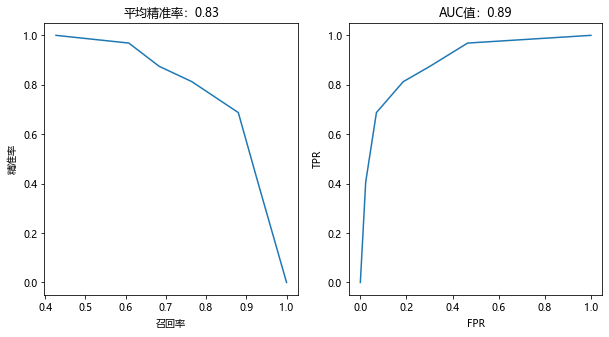

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve,average_precision_score,auc
def plotting(estimator,y_test):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    y_predict_proba = estimator.predict_proba(X_test)
    precisions,recalls,thretholds = precision_recall_curve(y_test,y_predict_proba[:,1])
    axes[0].plot(precisions,recalls)
    axes[0].set_title("平均精准率：%.2f"%average_precision_score(y_test,y_predict_proba[:,1]))
    axes[0].set_xlabel("召回率")
    axes[0].set_ylabel("精准率")

    fpr,tpr,thretholds = roc_curve(y_test,y_predict_proba[:,1])
    axes[1].plot(fpr,tpr)
    axes[1].set_title("AUC值：%.2f"%auc(fpr,tpr))
    axes[1].set_xlabel("FPR")
    axes[1].set_ylabel("TPR")
# 1. K近邻
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,features_temp,targets,cv=5)
print("准确率：",scores.mean())

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)
# 精准率
print("精准率：",precision_score(y_test,y_predict))
# 召回率
print("召回率：",recall_score(y_test,y_predict))
# F1-Score
print("F1得分：",f1_score(y_test,y_predict))

plotting(knn,y_test)



心脏病预测-决策树算法评估

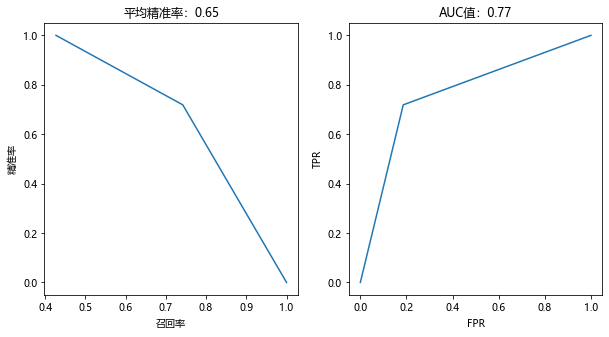

In [34]:
# 决策树
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train,y_train)

plotting(tree,y_test)


心脏病预测-随机森林算法评估

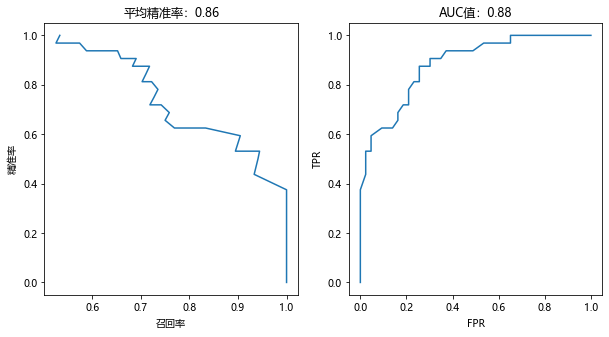

In [35]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
plotting(rf,y_test)


心脏病预测-逻辑回归算法评估

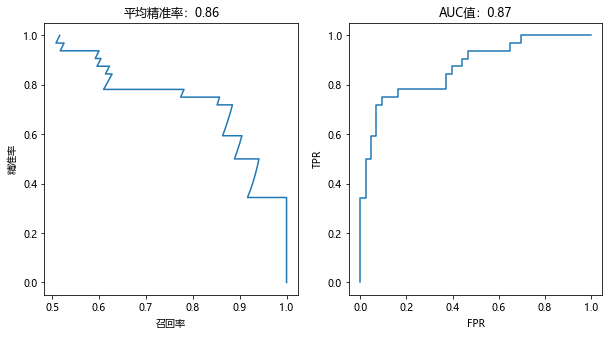

In [36]:
# 逻辑回归
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression(tol=1e-10)
logic.fit(X_train,y_train)
plotting(logic,y_test)


心脏病预测-SGD分类算法评估

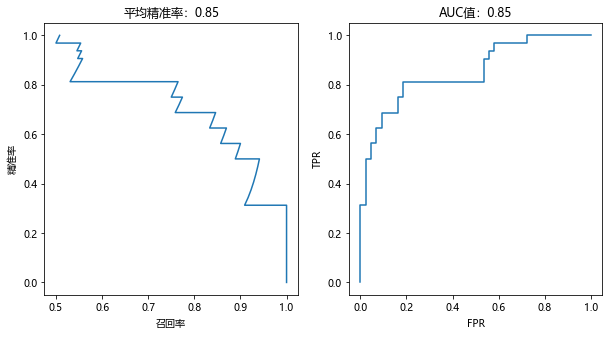

In [37]:
# SGD分类
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss="log")
sgd.fit(X_train,y_train)
plotting(sgd,y_test)


心脏病预测-特征重要性分析

<AxesSubplot:>

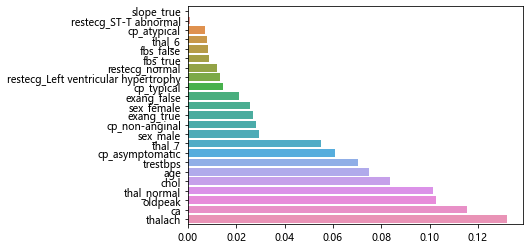

In [39]:
importances = pd.Series(data=rf.feature_importances_,index=features.columns).sort_values(ascending=True)
sns.barplot(y=importances.index,x=importances.values,orient='h')
